In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
import os
import random
import sys

sys.path.append("./../")
from copy import deepcopy
from pathlib import Path
from typing import get_type_hints

import networkx as nx
import numpy as np
import yaml
from matplotlib import pyplot as plt

from babisteps.basemodels.generators import DELIM, OrderModel
from babisteps.basemodels.nodes import Entity
from babisteps.basemodels.pathfinding import PathFinding, PathFindingRequestWhich
from babisteps.tasks.immediateorder.utils import (
    _get_list_relations,
    _get_relations_by_type,
    relations_type_to_entities_dict,
)

In [3]:
# yaml_path
yaml_common_path = './../babisteps/tasks/commons.yaml'
# Load the yaml file in yaml_test variable
with open(yaml_common_path, 'r') as file:
    yaml_commons = yaml.safe_load(file)

In [4]:
output_path = Path('/home/giskard/Documents/POKTscan/code/bAbI-steps/outputs')
# add output_path to yaml_commons 
yaml_commons['output_path'] = output_path

# PathFindingWhich

In [ ]:
edge_qty = 9
relations_qty = 2
n_entities = 10
path_length = 3
answer = path_length if random.random() > 0.5 else 'unknown'
verbosity = "INFO"
gen_kwargs = {}
path = os.path.join(os.getcwd())
path

'/home/giskard/Documents/POKTscan/code/pnyx/bAbI-steps/examples'

In [20]:
total_relations = yaml_commons.get("relations")
relation_types_compatibility = yaml_commons.get("relation_types_compatibility")
entity_choice = random.choice(["locations"])
print(entity_choice)
shape_str = (entity_choice,)
# Pick a random relation type
r_type_g = random.choice(
    list(get_type_hints(PathFindingRequestWhich)["relation_type"].__args__)
)
print(r_type_g)
r_name_by_r_type = _get_relations_by_type(total_relations)
# remove all keys from r_name_by_r_type except "absolute_position"
r_name_by_r_type = {k: v for k, v in r_name_by_r_type.items() if k == "absolute_position"}
print(r_name_by_r_type)

locations
absolute_position
{'absolute_position': ['south', 'east']}


In [21]:
# Get relations compatible with the selected type
relations = _get_list_relations(
    r_type_g,
    r_name_by_r_type,
    relations_qty,
    total_relations,
    relation_types_compatibility,
)

In [22]:
print(r_type_g)
print(relations_type_to_entities_dict[r_type_g])

absolute_position
['locations', 'actors', 'objects']


In [23]:
# Get entities compatible with the selected relation type
#entitie_type = random.choice(relations_type_to_entities_dict["locations"])
local_entities = yaml_commons.get("locations")
entities = np.random.choice(
    local_entities, size=n_entities, replace=False
).tolist()
entities = [Entity(name=entity) for entity in entities]
# Create the model
model = OrderModel(entities=entities, relations=relations)

In [24]:
model

OrderModel(entities=[Entity(name='bathroom'), Entity(name='kitchen'), Entity(name='living room'), Entity(name='garage'), Entity(name='store'), Entity(name='park'), Entity(name='street'), Entity(name='garden'), Entity(name='bedroom'), Entity(name='office')], relations=[Relationship(name='east', base=['east of', 'to the east of'], opposite=['west of', 'to the west of'], relation_type='absolute_position'), Relationship(name='south', base=['south of', 'to the south of'], opposite=['north of', 'to the north of'], relation_type='absolute_position')])

In [25]:
topic = PathFindingRequestWhich(
    answer = answer,
    relation_type = relations[0].relation_type ,
    shape_str = shape_str,
)

In [26]:
topic

PathFindingRequestWhich(answer=3, path=None, path_graph=None, relation_type='absolute_position', shape_str=('locations',), relations=None)

In [27]:
PathFindingRequestWhich.__name__

'PathFindingRequestWhich'

In [28]:
runtime_name = PathFindingRequestWhich.__name__ + DELIM + str(answer) + DELIM + str(0)
runtime_name

'PathFindingRequestWhich_-_3_-_0'

In [ ]:
generator = PathFinding(
    model=deepcopy(model)._shuffle(),
    edge_qty=edge_qty,
    topic=topic,
    path_length=path_length,
    verbosity=verbosity,
    log_file=os.path.join(path, "logs.txt"),
    name=runtime_name,
    **gen_kwargs if gen_kwargs is not None else {},    
)

In [30]:
generator.generate()

{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0", "level": "info", "event": "Connections between 5 and 1 is currently nan"}
{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0", "level": "info", "event": "Successfully added edge between 5 and 1 (attempt 0)"}
{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0", "level": "info", "event": "Connections between 8 and 1 is currently nan"}
{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0", "level": "info", "event": "Successfully added edge between 8 and 1 (attempt 1)"}
{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0", "level": "info", "event": "Connections between 1 and 7 is currently nan"}
{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0", "level": "info", "event": "Successfully added edge between 1 and 7 (attempt 3)"}
{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0", "level": "info", "event": "Connections between 7 and 5 is currently nan"}
{"logger": "PathFinding-PathFindingRequestWhich_-_3_-_0

Which path goes from the office to the kitchen?
['office', 'bathroom', 'kitchen']


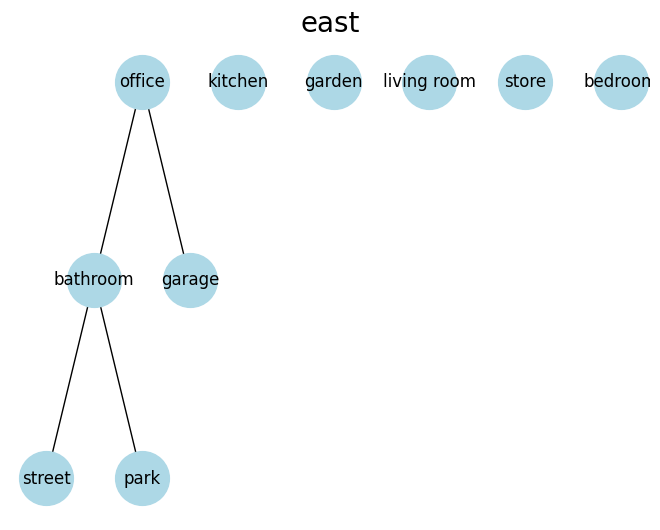

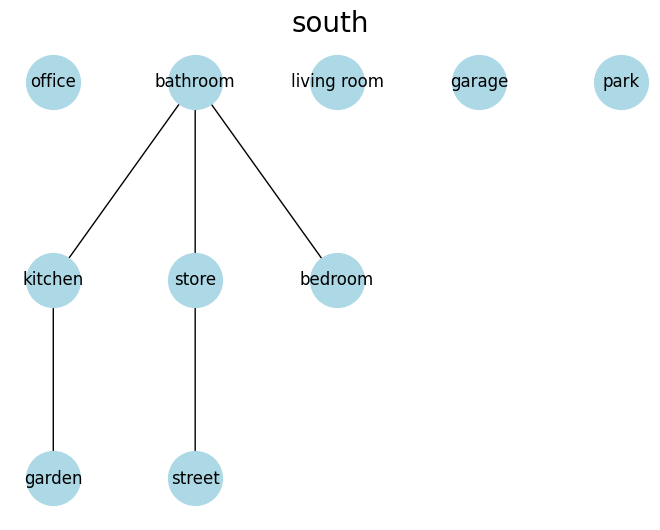

In [31]:
print(generator.topic.get_question())
print([e.name for e in generator.topic.path])
for GS, r in zip(generator.graphs, generator.model.relations):
    pos = nx.drawing.nx_agraph.graphviz_layout(GS.g, prog='dot')
    # Create a dictionary mapping nodes to their entity attributes
    node_labels = {node: data.get('entity').name for node, data in GS.g.nodes(data=True)}
    # Draw the graph with custom labels
    nx.draw(GS.g, pos, labels=node_labels, node_color='lightblue', node_size=1500, arrowsize=20,arrows=True)
    plt.title(r.name, fontsize=20)
    plt.show()

In [32]:
generator.get_json()

{'idx': 0,
 'question': 'Which path goes from the office to the kitchen?',
 'answer': ['office', 'bathroom', 'kitchen'],
 'world_enumerate': 'There is a bedroom. There is a kitchen. There is a garage. There is a store. There is a garden. There is a street. There is a office. There is a park. There is a living room. There is a bathroom. ',
 'story': 'The bathroom is to the west of the office.\nThe bedroom is north of the bathroom.\nThe bathroom is to the south of the kitchen.\nThe bathroom is north of the store.\nThe street is south of the store.\nThe bathroom is east of the park.\nThe street is west of the bathroom.\nThe kitchen is north of the garden.\nThe garage is east of the office.\n',
 'options': [['office',
   'bathroom',
   'bedroom',
   'garden',
   'living room',
   'park',
   'store',
   'street',
   'kitchen'],
  ['office', 'living room', 'park', 'store', 'kitchen'],
  ['office', 'bathroom', 'garage', 'store', 'street', 'kitchen'],
  ['office', 'bathroom', 'garage', 'garden